# Otimizações do pré-processamento e modelo obtidos no PIBIC

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

df = pd.read_csv('dataframe_janelado_median_100.csv')
df.head()

,index,acc_x_std,acc_y_std,acc_z_std,gyro_x_std,gyro_y_std,gyro_z_std,speed,good_road
0,99,0.365116,0.165499,9.784384,-0.027084,0.026894,-0.029755,0.009128,1
1,100,0.364517,0.165499,9.781990,-0.027084,0.026894,-0.037384,0.009128,1
2,101,0.363320,0.165499,9.784384,-0.027084,0.026894,-0.037384,0.009128,1
3,102,0.362123,0.165499,9.784384,-0.027084,0.026894,-0.037384,0.009128,1
4,103,0.361524,0.166696,9.784384,-0.027084,0.026894,-0.052643,0.009128,1


Remoção da coluna de 'index' por questões de redundância

In [2]:
df = df.drop(['index'], axis=1)
df.head()

,acc_x_std,acc_y_std,acc_z_std,gyro_x_std,gyro_y_std,gyro_z_std,speed,good_road
0,0.365116,0.165499,9.784384,-0.027084,0.026894,-0.029755,0.009128,1
1,0.364517,0.165499,9.781990,-0.027084,0.026894,-0.037384,0.009128,1
2,0.363320,0.165499,9.784384,-0.027084,0.026894,-0.037384,0.009128,1
3,0.362123,0.165499,9.784384,-0.027084,0.026894,-0.037384,0.009128,1
4,0.361524,0.166696,9.784384,-0.027084,0.026894,-0.052643,0.009128,1


Analisando o dataframe por completo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080806 entries, 0 to 1080805
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   acc_x_std   1080806 non-null  float64
 1   acc_y_std   1080806 non-null  float64
 2   acc_z_std   1080806 non-null  float64
 3   gyro_x_std  1080806 non-null  float64
 4   gyro_y_std  1080806 non-null  float64
 5   gyro_z_std  1080806 non-null  float64
 6   speed       1080806 non-null  float64
 7   good_road   1080806 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 66.0 MB


Modelo com todas as colunas

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

clf = ExtraTreesClassifier()
X = df.drop(['good_road'], axis=1)
y = df['good_road']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9997841118670623


Testando o modelo sem a coluna de velocidade

In [5]:
df2 = df.drop(['speed'], axis=1)

X = df2.drop(['good_road'], axis=1)
y = df2['good_road']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9938317676303502


Testando só com acelerômetro

In [6]:
df3 = df.drop(['speed', 'gyro_x_std', 'gyro_y_std', 'gyro_z_std'], axis=1)

X = df3.drop(['good_road'], axis=1)
y = df3['good_road']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9388142190092585


Com acelerômetro e velocidade

In [7]:
df4 = df.drop(['gyro_x_std', 'gyro_y_std', 'gyro_z_std'], axis=1)

X = df4.drop(['good_road'], axis=1)
y = df4['good_road']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9995898125474183


Comparando df com df4

Dataset completo
Acurácia média:  0.9997686912861381
Classification report:
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998    187181
           1     0.9998    0.9997    0.9997    137061

    accuracy                         0.9998    324242
   macro avg     0.9998    0.9998    0.9998    324242
weighted avg     0.9998    0.9998    0.9998    324242



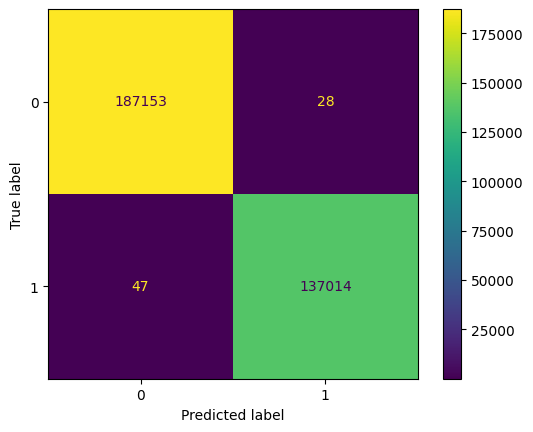

AUC score da ROC Curve:  0.999753749579183


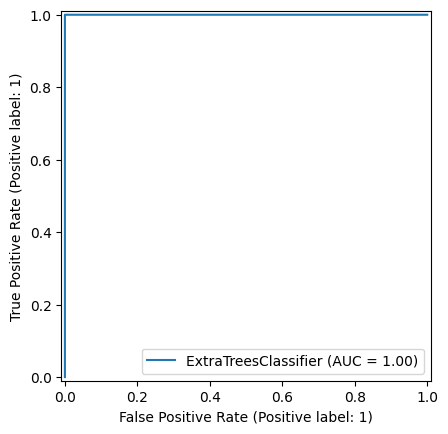

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print('===================\nDataset completo')
X = df.drop(['good_road'], axis=1)
y = df['good_road']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Acurácia média: ', clf.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, y_pred, digits=4))

conf_mat = confusion_matrix(y_test, y_pred)     # Criando a matriz de confusao
disp = ConfusionMatrixDisplay(conf_mat)         # Criando o display pra matriz
disp.plot()                                     # Plotando o display
plt.show()                                      # Mostrando o plot com matplotlib

print('AUC score da ROC Curve: ', roc_auc_score(y_test, y_pred))
RocCurveDisplay.from_estimator(clf, X, y)
plt.show()

Dataset só com acelerômetro e velocidade
Acurácia média:  0.9995373825722763
Classification report:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996    187112
           1     0.9997    0.9992    0.9995    137130

    accuracy                         0.9995    324242
   macro avg     0.9996    0.9995    0.9995    324242
weighted avg     0.9995    0.9995    0.9995    324242



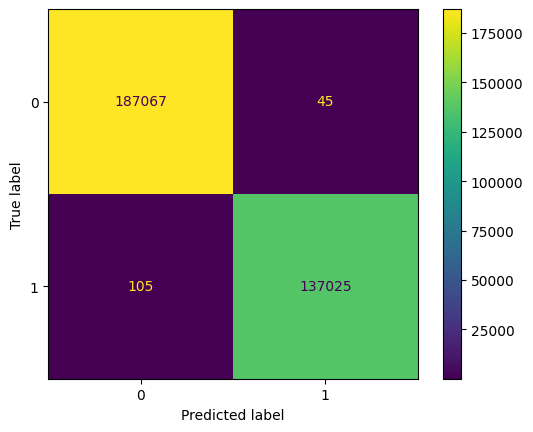

AUC score da ROC Curve:  0.9994969027730409


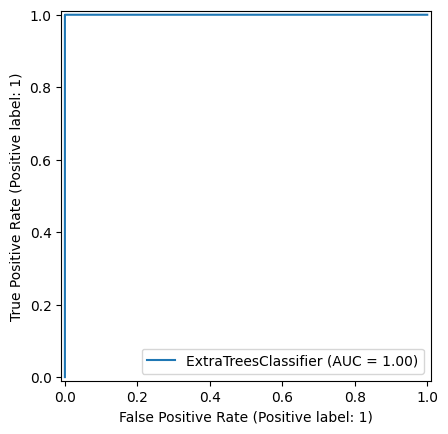

In [9]:
print('===================\nDataset só com acelerômetro e velocidade')
X = df4.drop(['good_road'], axis=1)
y = df4['good_road']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Acurácia média: ', clf.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, y_pred, digits=4))

conf_mat = confusion_matrix(y_test, y_pred)     # Criando a matriz de confusao
disp = ConfusionMatrixDisplay(conf_mat)         # Criando o display pra matriz
disp.plot()                                     # Plotando o display
plt.show()                                      # Mostrando o plot com matplotlib

print('AUC score da ROC Curve: ', roc_auc_score(y_test, y_pred))
RocCurveDisplay.from_estimator(clf, X, y)
plt.show()

Otimizando os hiperparâmetros do classificador

In [12]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

param = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None],
    'min_samples_leaf': [1, 10, 20],
    'max_features': ['log2', 'sqrt', 2, 4]
}

X = df.drop(['good_road'], axis=1)
y = df['good_road']

clf = GridSearchCV(ExtraTreesClassifier(), param_grid=param, cv=KFold(n_splits=3, shuffle=True), verbose=3, n_jobs=-1)
clf.fit(X, y)
print(clf.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
ExtraTreesClassifier(criterion='entropy', max_features=4)


Testando os hiperparâmetros (criterion='entropy', max_features=4)

In [ ]:
clf = ExtraTreesClassifier(criterion='entropy', max_features=4)
clf.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Acurácia média: ', clf.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, y_pred, digits=4))

conf_mat = confusion_matrix(y_test, y_pred)     # Criando a matriz de confusao
disp = ConfusionMatrixDisplay(conf_mat)         # Criando o display pra matriz
disp.plot()                                     # Plotando o display
plt.show()                                      # Mostrando o plot com matplotlib

print('AUC score da ROC Curve: ', roc_auc_score(y_test, y_pred))
RocCurveDisplay.from_estimator(clf, X, y)
plt.show()